# Lab 2.8: Tree Based Methods

In this case, we will be conduct a simpler exercise with decision trees using previous implementations. In particular, we will make use of several implemented methods in ML libraries s.a. `sklearn` (_that should be good news for you, doesn't it?_). With this, we will try to explore the main characteristics of decision trees, that you will also have to explore in the more theoretical part of the lab (the other exercise, the one on the pdf).

We will begin, as usual, importing the relevant libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


# ML libraries to construct, use and analyse the trees
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
from IPython.display import Image  
from sklearn.metrics import mean_squared_error, confusion_matrix
import pydotplus

from sklearn.metrics import mean_squared_error

We will first apply this to a regression dataset so that you see the way the model is constructed for this case 

## Regression Tree

For starters, let us try out a regression tree. To that end, first load the `Hitters.csv` dataset from the `data` 
folder.

In [3]:
hitters = pd.read_csv('Hitters.csv').dropna()

# Print the columns here to check their names
print(hitters.columns)

Index(['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


For this first case, we will only use the variables `Years` and `Hits` for the tree. Our target variable will be `Salary`. Separate them into `X` and `y`

In [4]:
# Separate the independent variables (X) from the dependent one (y - salary)
 
X = hitters[['Years', 'Hits']]
y = hitters['Salary']

Construct a _decision tree regressor_ using the `sklearn` function and fit it. To do that, check out the `DecisionTreeRegressor` in sklearn and implement it here.

For reproducibility, fix the `random_state` to `0` and the `max_leaf_nodes` to `3` (make sure you know what this last thing does!)

In [5]:
# Construct the regressor
regressor = DecisionTreeRegressor(random_state=0, max_leaf_nodes=3)

# Fit it with the .fit method
regressor.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

Now we will employ some functions engrained in `StringIO` alongside the method `export_graphviz` from the `tree` object in sklearn. This will enable us to visualize the constructed tree.

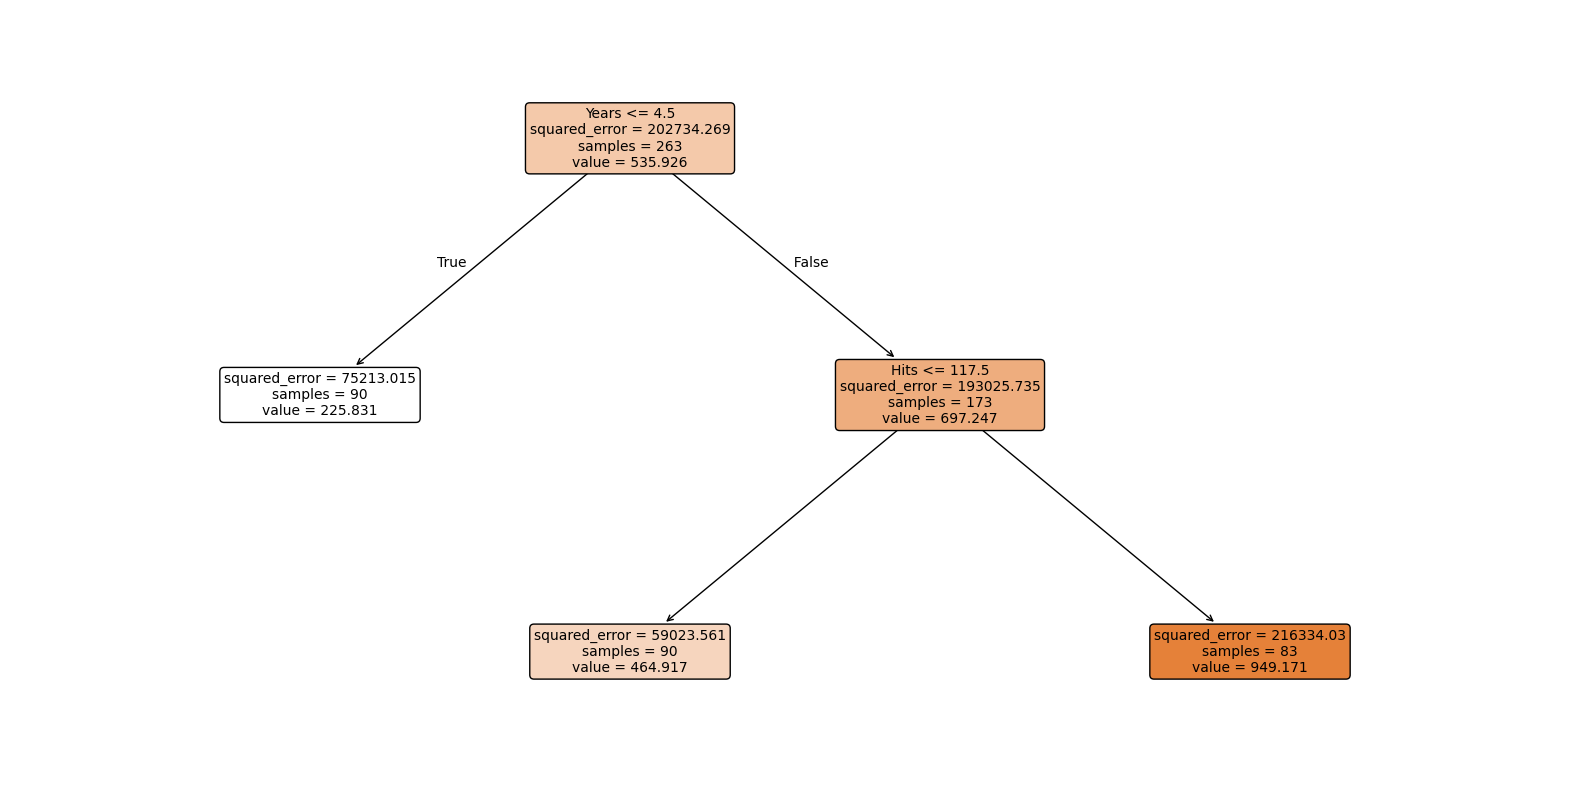

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) # Adjust the s
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

> Question: Describe the previous tree. What do you see? Do you think this will work well? Respond **briefly** Se ve que está haciendo los cortes con dos variables (years y hits) para obtener el valor del salario. Puede que esté sobresimplificando el problema, ya que hace solo dos cortes
 

Now we will plot the decision regions using the information on the cuts. Add lines wherever needed so that you can see the decision boundaries for the regression tree above

C:\Users\marta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


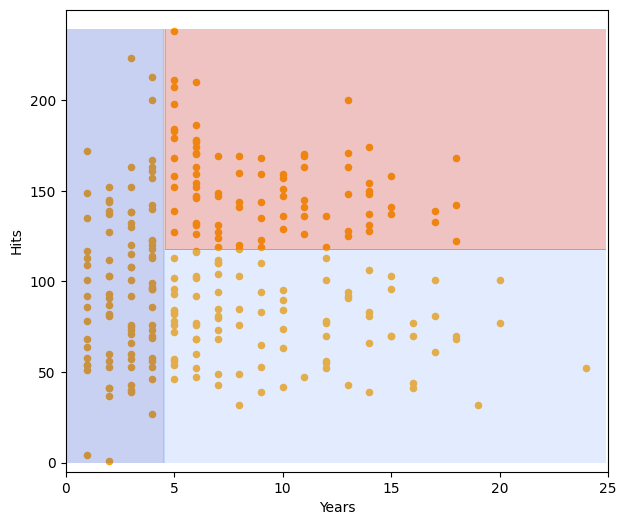

In [11]:
hitters.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)

# Add decision boundaries
x_min, x_max = X['Years'].min() - 1, X['Years'].max() + 1
y_min, y_max = X['Hits'].min() - 1, X['Hits'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict salary for each point in the grid
Z = regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

## Tree Size

Now, for the previous part we limited the growth of the tree so that we recovered a simple (but easily interpretable) tree. Now we will go all-out: we will construct a more exhaustive tree using different variables. For this particular case, let us use **all variables except** `League`, `Division`, `NewLeague` and `Salary` as independent variables to predict, precisely, the `Salary` value. 

In [12]:
# Construct the input variable dataset
X = hitters.drop(["Player","League", "Division", "NewLeague", "Salary"], axis=1)  # Remove the categorical variables and the target variable

# Print the column names to check
print(X.columns)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')


We will now perform the train/test split, but we will do it so that the proportion of train and test examples is $50\%$ (that is, train and test consist on $50\%$ of the datapoints).

In [14]:
# Perform the train-test split here. Do it so that the  
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=0) # Fill the NAs, fixing also the random_state to 0 for reproducibility

Now, train the tree to its fullest extent: put no limits on the growth and see what happens. You can re-use some of the previous `graphviz` code to visualize the tree here. Plot the complete tree.

In [15]:
# Train the tree without limits to its growth (random_state = 0)
unlimited_tree_regressor = DecisionTreeRegressor(random_state=0)
unlimited_tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

Reuse the code you need to plot the tree here

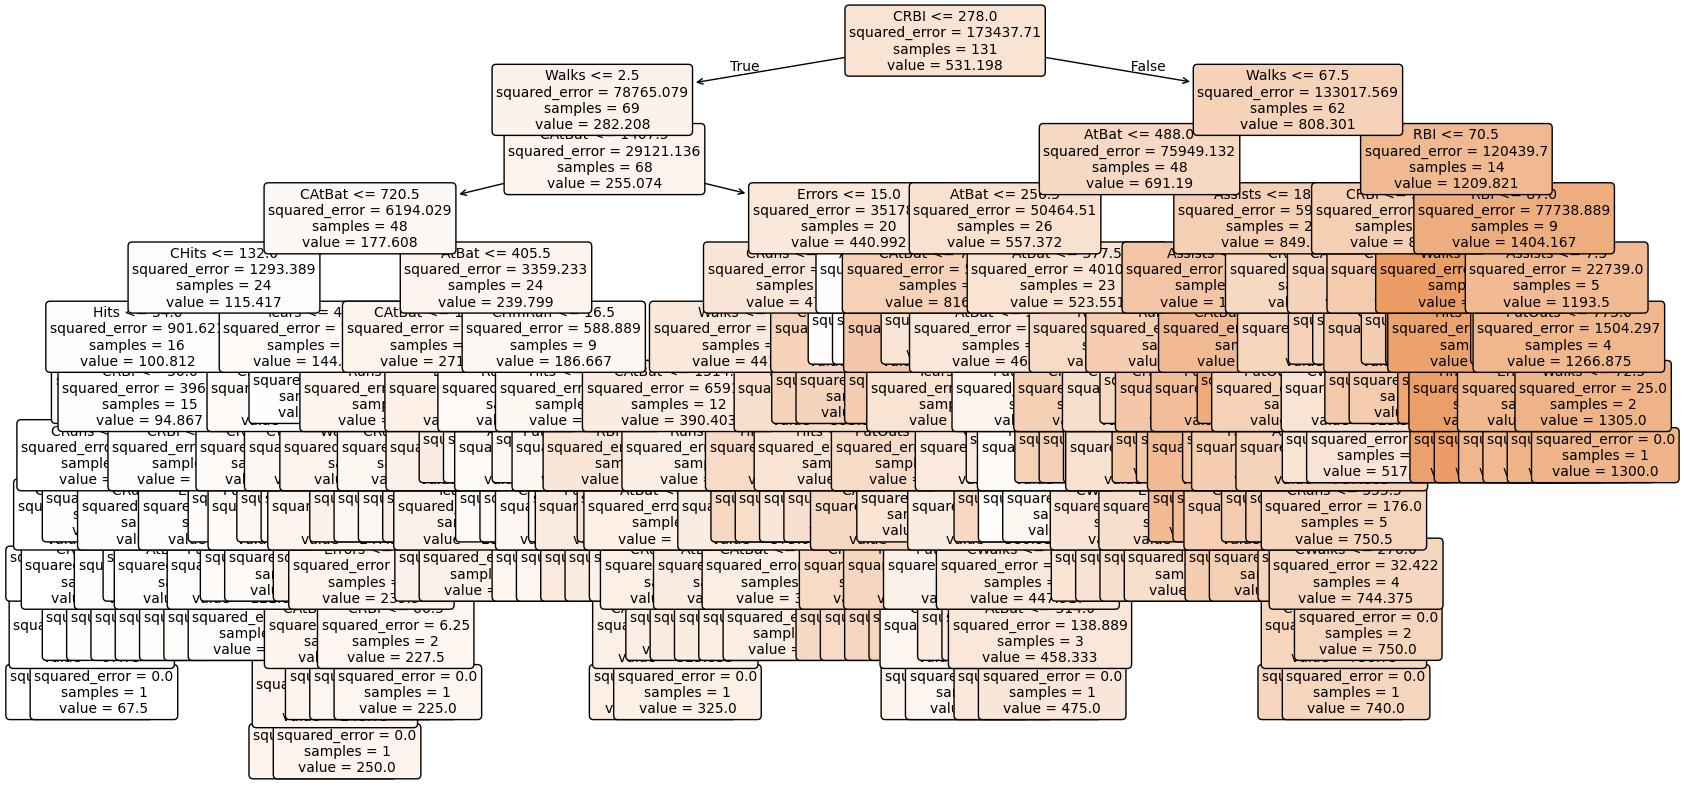

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plot_tree(unlimited_tree_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()


> Question: What do you see? What can you say about this tree? Does it have any important properties? Hace muchos más cortes. Probablemente tenga R^2 = 1 en el train, pero haga overfitting


Maybe we went _a bit too far_ with the tree... Let's set up some limitations to see everything better. Try setting the `max_features` to 9, and the `max_depth` to 4. (_It is important you understand what these parameters do! Check out the documentation in the [library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)_)

In [18]:
regressor_2 =  DecisionTreeRegressor(random_state = 0, max_depth=4, max_features=9)
regressor_2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=9, random_state=0)

Reuse the code you may need to plot the tree here

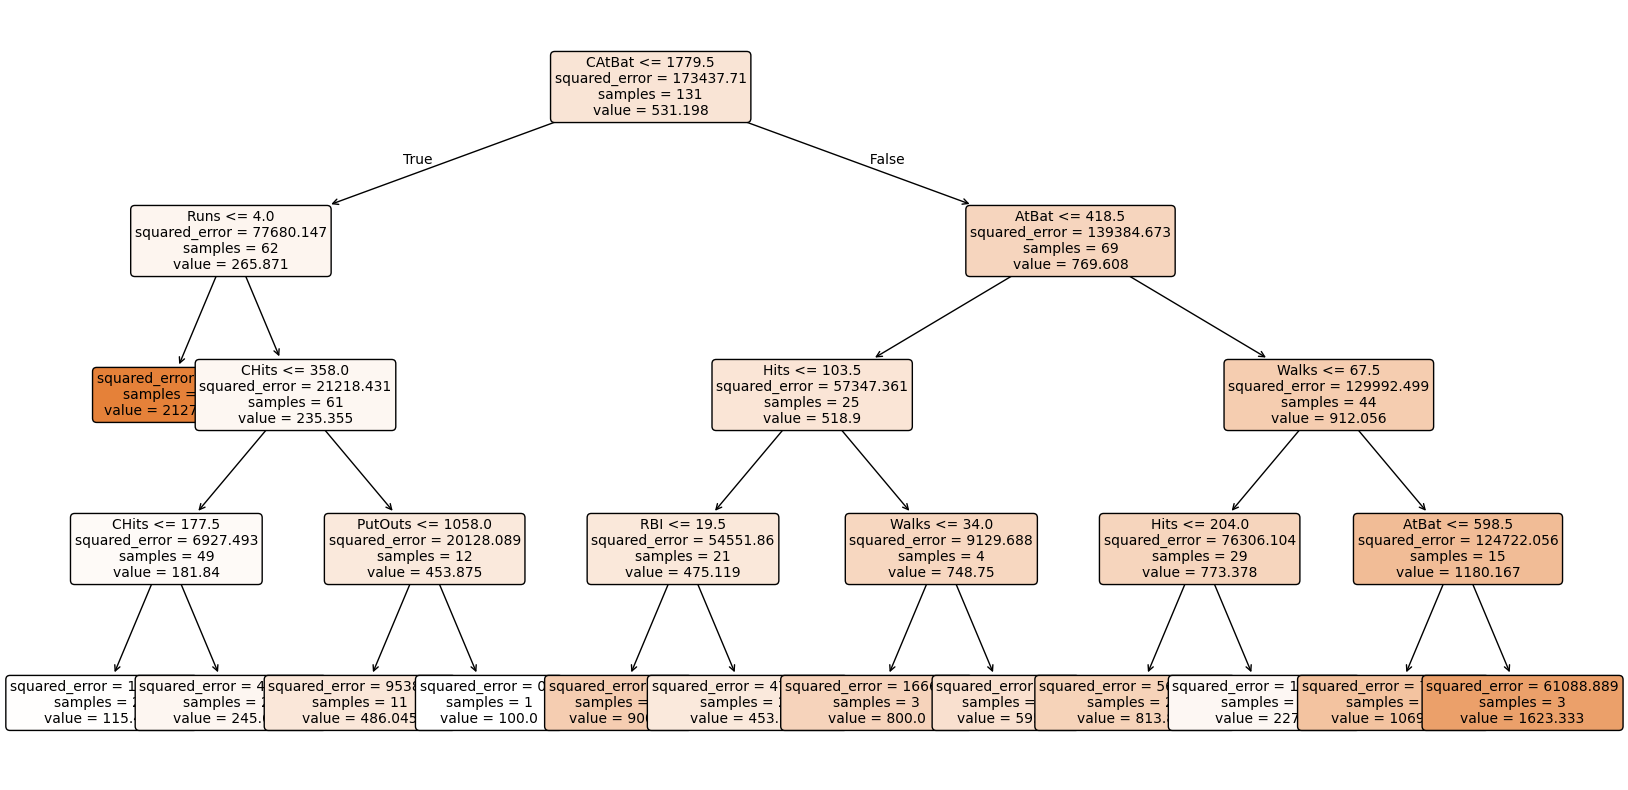

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plot_tree(regressor_2, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

Let us see if this tree works well at all... Since we are performing regression, we can obtain the RMSE (we use the Root MSE since it shares the same dimensions of the outputs):

In [ ]:
# Obtain the predictions for x_test
predictions = regressor_2.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 369.8405919459622


Now, the question is: how do we know which tree depth to select here? As you may expect, the answer is, as almost always here, performing _cross validation_. In this particular instance we will not conduct exhaustive cross validation. Instead, we will do it in a very simple manner, obtaining *a single tree* for each depth value we want, fitting it to the data and seeing how well does it perform both in train and test  fitted to the data. To do this, do the following:
* Fit a **fixed max depth** (`i`) decision tree regressor using *all `x_train` variables*. Also, *fix the `random state` to 1* for reproducibility.
* Register its train and test RMSEs
* Plot the train and test RMSE curves for each `i` depth  

Make sure that you explore _enough_ depth values. 

Text(0, 0.5, 'Root Mean Squared Error')

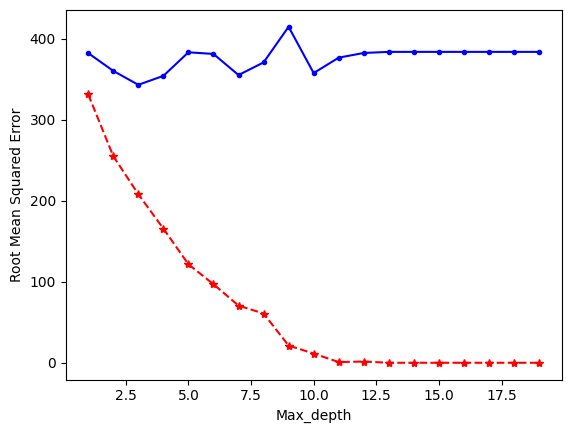

In [27]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1,20)

for i in tree_size:
    
    regressor =  DecisionTreeRegressor(random_state = 1, max_depth=i, max_features=9)
    regressor.fit(x_train,y_train)
    predictions = regressor.predict(x_test)
    predictions2 = regressor.predict(x_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions2))
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

# Plot the results
plt.plot(tree_size, train_rmse, 'r*--')
plt.plot(tree_size, test_rmse, 'b.-')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')


> Question: What do you see here? What depth value would you select? Escogería el mínimo que tiene entre 2.5 y 5



Since we are not really making CV, we do not have multiple values for the train and test RMSE for each tree. Therefore, we *do not* have errorbars in the previous plot. That should raise some suspicions from your part. 

> Question: What happens if we change the `random_state` value? Are the previous results robust?

To answer the previous question you can try out code in the next cell. Feel free to try whatever you think is needed here.

Text(0, 0.5, 'Root Mean Squared Error')

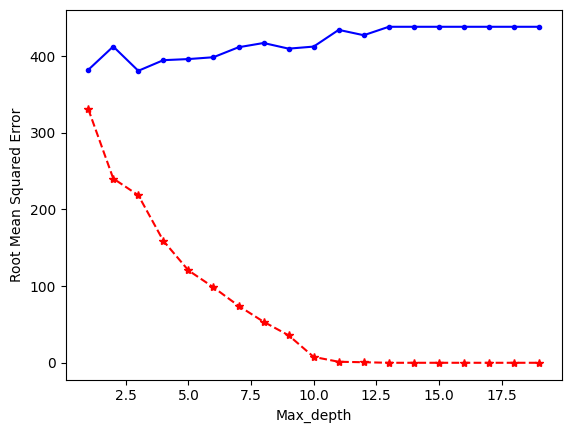

In [29]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1,20)

for i in tree_size:
    
    regressor =  DecisionTreeRegressor(random_state = 4, max_depth=i, max_features=9)
    regressor.fit(x_train,y_train)
    predictions = regressor.predict(x_test)
    predictions2 = regressor.predict(x_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions2))
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions))
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

# Plot the results
plt.plot(tree_size, train_rmse, 'r*--')
plt.plot(tree_size, test_rmse, 'b.-')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')


In order to get more acquainted with the results, check out what happens if you include less  `x_train` features. To do so, change what you need from the previous block of code and put it in the next block here.
> Question: Do you see any important changes? How do you explain this?  Al añadir menos elementos de x_train, podemos ver que al cambiar el random_state, varía todavía más, ya que pueden quedar fuera variables importantes (se harán menos cortes
)

Best max_depth: 3


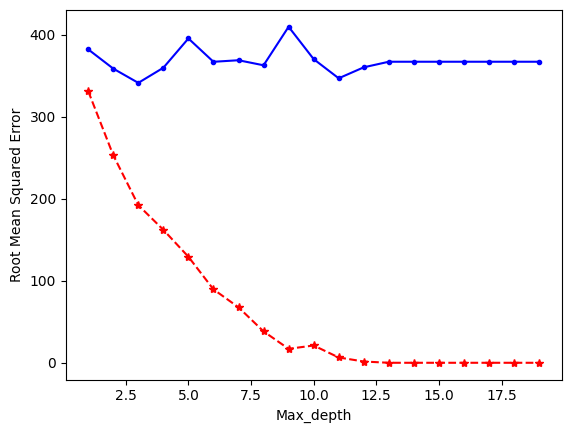

In [32]:
# Lists to store the results
train_rmse = []
test_rmse = []

# Range of depths to be explored
tree_size = np.arange(1,20)

for i in tree_size:

    regressor_3 = DecisionTreeRegressor(random_state=5, max_depth=i, max_features=9)
    regressor_3.fit(x_train, y_train)

    prediction_train = regressor_3.predict(x_train)
    rmse_train = np.sqrt(np.mean((prediction_train-y_train)**2))
    train_rmse.append(rmse_train)
    
    prediction_test = regressor_3.predict(x_test)
    rmse_test = np.sqrt(np.mean((prediction_test-y_test)**2))
    test_rmse.append(rmse_test)
    

# Plot the results
plt.plot(tree_size, train_rmse, 'r*--')
plt.plot(tree_size, test_rmse, 'b.-')
plt.xlabel('Max_depth')
plt.ylabel('Root Mean Squared Error')

# Find the index of the minimum test RMSE
best_depth = tree_size[np.argmin(test_rmse)]
print("Best max_depth:", best_depth)

## Classification Tree

In order to complete this practical exercises with trees, we will also try out some classification trees to later do ensembles. Let us see how this works. 

First, load the `Carseat.csv` dataset from `data` (make sure to remove the NAs, as before)

In [33]:
# Load the dataset (remove the NAs)
carseats = pd.read_csv("Carseat.csv")
carseats.dropna(inplace=True)

Make it so that we have a new binary variable called `high`. This variable should be `1` when `sales` are over 8, and `0` otherwise.

In [34]:
carseats['high'] = (carseats["Sales"] > 8).astype(int)

Convert the remaining variables to make them usable here

The variables `ShelveLoc`, `Urban` and `US` need to be converted to categorical variables to be correctly used. To that end, I suggest you use `pd.factorize` (although feel free to do as you will here...)

In [35]:
carseats['ShelveLoc'] = pd.factorize(carseats['ShelveLoc'])[0]
carseats['Urban'] = pd.factorize(carseats['Urban'])[0]
carseats['US'] = pd.factorize(carseats['US'])[0]

Now, we will employ all variables to predict the `high` value (except `Sales` and `high`, for obvious reasons). Note that we have essentially converted a _regression_ problem into a _binary classification_ one.

In [36]:
X =  carseats.drop(columns=["Sales", "high"]) 
y =  carseats["high"] 

# Performn the train/test split with again 50% data for train and 50% for test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Construct a decision tree classifier. To control for the depth, we will fix it to a *maximum depth of 6*. Use as impurity criteria the **Gini index**.

In [37]:
carseats_classifier = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=0)
carseats_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

Plot the tree (again, reuse whatever you may need here)

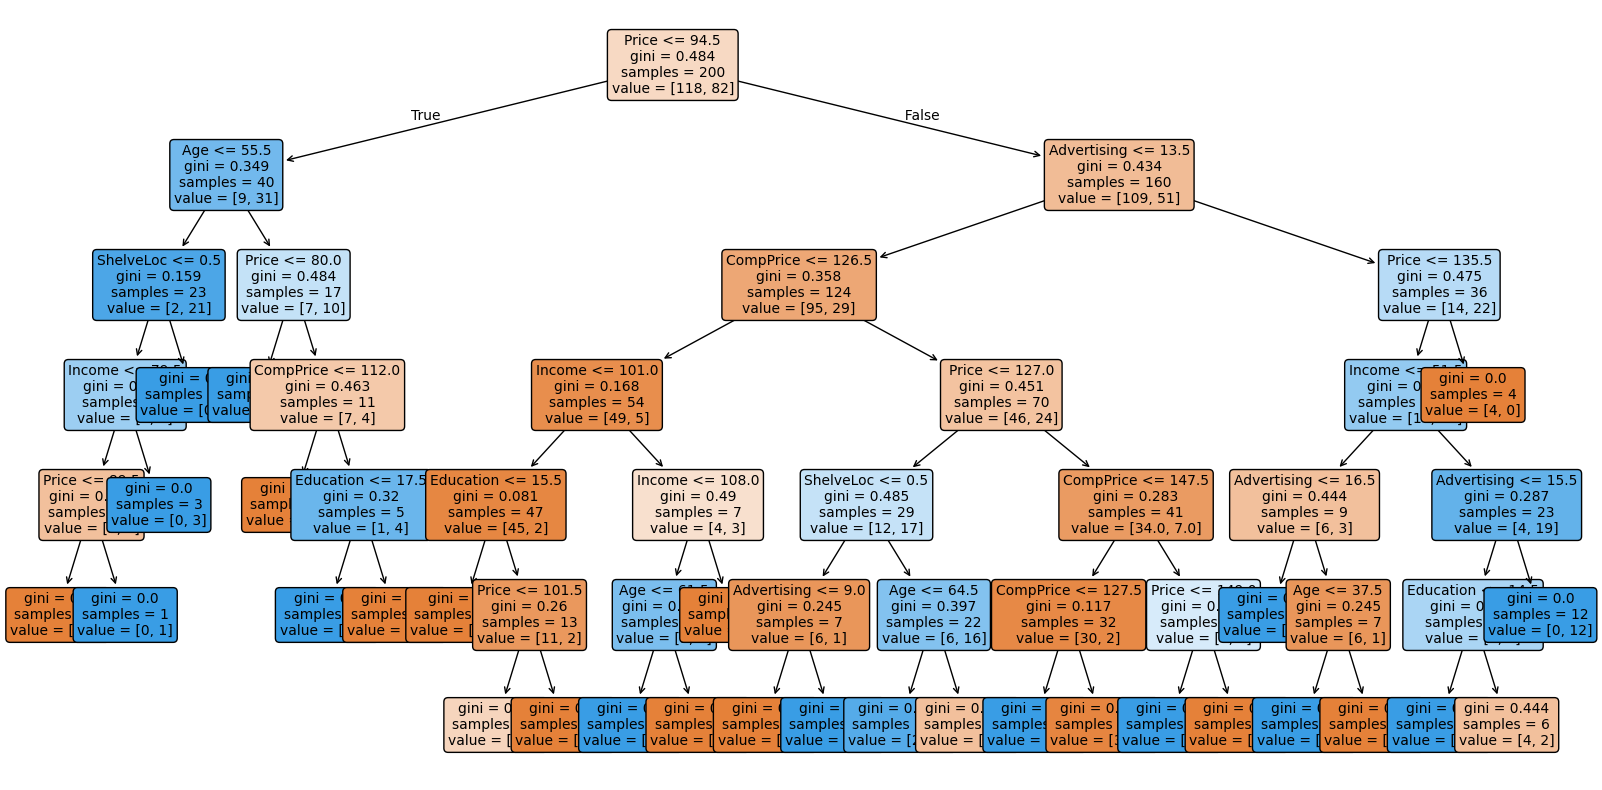

In [38]:
plt.figure(figsize=(20,10)) 
plot_tree(carseats_classifier, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

Let us now assess the quality of the tree. To that end, **represent the confusion matrix** for the test data

In [39]:
from sklearn.metrics import precision_score

y_pred = carseats_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

unique_values = carseats['high'].groupby(carseats['high']).count()
print("Number of unique values in 'high':", unique_values)

Confusion Matrix:
[[101  17]
 [ 32  50]]
Precision: 0.746268656716418
Number of unique values in 'high': high
0    236
1    164
Name: high, dtype: int64


> Questions: 
> * What is the **precision** of this tree?
> * Do you consider the dataset balanced?
La precisión es del 0.746, y podemos ver que no está balanceado (72 0 más)

# Ensembles

Now we will try out some of the ensemble methods from class. Remember there is an stochastic component embedded in these for the most part, so we may not recover exactly the same results twice depending on how you implement things.

## Bagging

The decision tree models mentioned above usually suffers from high variance. **B**ootstrap **agg**regation, or **bagging** usually helps with this issue. To do bagging here, we will do it both by hand and by employing the sklearn function.

First, let's go with the *by-hand* implementation

In [ ]:
# Set the bagging parameters
n_estimators = 10  # Number of decision trees in the ensemble
max_samples = 0.8  # Proportion of samples to be used for each bootstrap sample
samples = X_train.shape[0]
# Store the predictions
predictions = []

for _ in range(n_estimators):

    # Create a bootstrap sample
    sample_indices = np.random.choice(samples, size=int(max_samples*samples), replace=True)
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices] 
    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree = DecisionTreeClassifier() 
    decision_tree.fit(X_bootstrap, y_bootstrap)
        
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

# Combine predictions
# For classification, use majority voting
majority_vote = np.apply_along_axis(lambda x: mode(x).mode[0], axis=0, arr=np.array(predictions))

# For regression, you can use averaging
# combined_predictions = np.(predictions, axis=0)  # For classification, use np.mean for voting



[0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0]


Print the confusion matrix

In [46]:
conf_matrix = confusion_matrix(y_test, majority_vote)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[104  14]
 [ 33  49]]


Let's see how this is done in `sklearn`... Fit it and show the confusion matrix

In [47]:
bagging = BaggingClassifier(random_state=0, n_estimators=10, max_samples=max_samples)
bagging.fit(X_train, y_train)

bagging_pred = bagging.predict(X_test)

conf_matrix = confusion_matrix(y_test, bagging_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[100  18]
 [ 35  47]]


We will use the `sklearn` implementation to study the variable importance. *Make sure you understand how this is done!*

<Axes: >

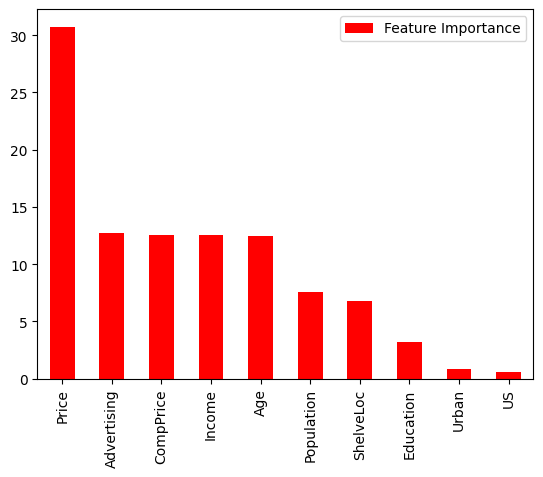

In [ ]:
feature_importances = np.mean(
    [tree.feature_importances_ for tree in bagging.estimators_], axis=0
)

bagging_featureImportance = pd.DataFrame({'Feature Importance': feature_importances * 100}, index=X.columns)
bagging_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: What do you see here? La variable más importante es Price, mientras que la menos importante es US

## Random Forest

We will also do this in the RF case. First, we will implement it by hand. Feel free to use the previous code and modify it as you may see fit to do RF here!

In [51]:

# RF parameters
n_estimators = 10  # Number of decision trees in the forest
max_features = 0.8  # Proportion of features to consider for each split
num_features = X_train.shape[1]
predictions = []
for _ in range(n_estimators):

    sample_indices = np.random.choice(samples, size=int(max_samples*samples), replace=True)
    X_bootstrap = X_train.iloc[sample_indices]
    y_bootstrap = y_train.iloc[sample_indices] 
    
    # Train a decision tree classifier on the bootstrap sample
    decision_tree = DecisionTreeClassifier(max_features=int(max_features * num_features))  # Randomly select features for each tree
    decision_tree.fit(X_bootstrap, y_bootstrap)
    
    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)




majority_vote = np.array(predictions).T
majority_vote = mode(majority_vote, axis=1).mode.flatten()

Print the confusion matrix

In [52]:
conf_matrix = confusion_matrix(y_test, majority_vote)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[106  12]
 [ 30  52]]


Let us do it again with `sklearn` so you see the differences... Show the confusion matrix. In this last part there may be some differences with your run, which are due to the randomness of the classifiers constructed. Do not worry too much about it here.

In [53]:
# Construct the RF classifier with RandomForestClassifier. Fix the random_state to 0, n_estimators to 10 and max_features to 0.8
rf = RandomForestClassifier(random_state=0, n_estimators=10, max_features=0.8)

# Train it
rf.fit(X_train, y_train)

# Predict the test values
rf_pred= rf.predict(X_test)

# Obtain the confusion matrix and print it
conf_matrix = confusion_matrix(y_test, majority_vote)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[106  12]
 [ 30  52]]


Using again the `sklearn` implementation, we will study the feature importance

<Axes: >

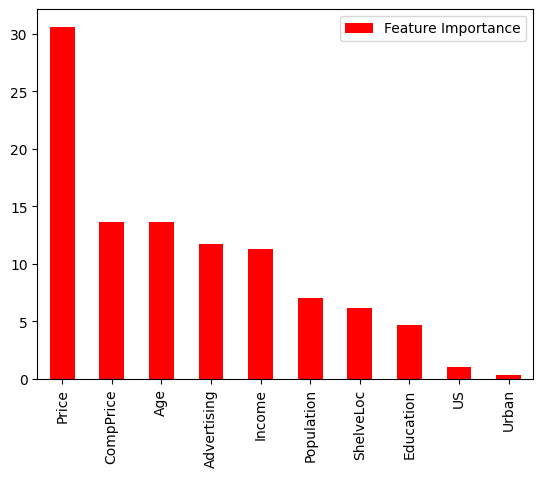

In [55]:
feature_importances = np.mean(
    [tree.feature_importances_ for tree in bagging.estimators_], axis=0
)
rf_featureImportance= pd.DataFrame({'Feature Importance':rf.feature_importances_*100}, index= X.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

> Question: Given the models thus far (simple tree, bagging and RF), which one would you choose and why? Escogería RF, ya que al tener más aletoriedad, tiene mayor precisión

## Extra: Boosting

In order to fully complete our review of the ensemble methods from class, we are missing the **Boosting method**. In order to keep matters simple, we will implement it here with `sklearn` so that you get to see what it looks like...

In [58]:
# Import the model
from sklearn.ensemble import GradientBoostingClassifier

# Create the Boosting model
gb= GradientBoostingClassifier(n_estimators = 5000, random_state = 1, max_depth = 2)
gb.fit(X_train, y_train)

# If you want to try it out, you can change reuse most of previous codes to run it here!

GradientBoostingClassifier(max_depth=2, n_estimators=5000, random_state=1)

The results are pretty good! Keep in mind that this is achieved with super weak learners s.a. trees with depth 2. It is quite fast, and super easy to use with `sklearn`. We can also study the variable importance in this case.

<Axes: >

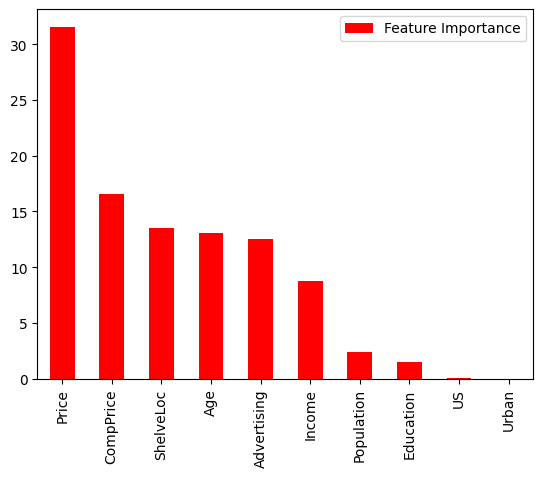

In [59]:
gb_featureimportance= pd.DataFrame({'Feature Importance': gb.feature_importances_*100}, index= X.columns)
gb_featureimportance.sort_values('Feature Importance', ascending=False).plot(kind='bar', color='red')

If you want to see how this can be implemented easily by hand, you can use the following code. We are using an implementation that follows a description of Boosting mode similar to the one given in the ISLR book

In [60]:
# Initialize the parameters
n_estimators = 1000  # Number of decision trees in the ensemble
learning_rate = 0.1  # Learning rate for each decision tree

# Initialize the weights for the training samples
sample_weights = np.ones(len(X_train)) / len(X_train)

# Train decision trees with weighted samples and make predictions
predictions = []
for _ in range(n_estimators):

    # Train a decision tree classifier on the weighted training samples
    decision_tree = DecisionTreeClassifier(max_depth = 2)
    decision_tree.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions on the test set using the trained decision tree
    y_pred = decision_tree.predict(X_test)
    predictions.append(y_pred)

    # Calculate error
    incorrect = (y_pred != y_test).astype(int)
    error = np.sum(sample_weights * incorrect) / np.sum(sample_weights)

    # Update sample weights
    alpha = learning_rate * np.log((1 - error) / error)
    sample_weights *= np.exp(alpha * incorrect)

# Combine predictions
# For classification, you can use weighted voting
combined_predictions = np.zeros(len(X_test))
for prediction in predictions:
    combined_predictions += prediction

# Evaluate the performance of the boosting ensemble
conf_matrix = confusion_matrix(y_test, combined_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[102   0  16]
 [ 46   0  36]
 [  0   0   0]]
